# Carga De Datos y Librerias

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
test_df = pd.read_csv('test_dataset.csv')
train_df = pd.read_csv('train_dataset.csv')

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_important_metrics(original_target, predicted, title ):
    mae = mean_absolute_error(original_target, predicted)
    mse = mean_squared_error(original_target, predicted)
    r2 = r2_score(original_target, predicted)

    print(title)
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    

In [33]:
from sklearn.linear_model import LinearRegression

y_train = train_df['target']                    # get the target column of the train dataset
X_train = train_df.drop(columns=['target'])  # drop the target column

y_test = test_df['target']                      # get the target column of the test dataset
X_test = test_df.drop(columns=['target'])    # drop the target column


# Linear egression model
Linear_reg_model = LinearRegression()
# Calibrate the model
Linear_reg_model.fit(X_train, y_train)

# Predictions
y_train_pred = Linear_reg_model.predict(X_train)
y_test_pred = Linear_reg_model.predict(X_test)


print_important_metrics(y_train, y_train_pred, "Training metrics:")
print_important_metrics(y_test, y_test_pred, "Test metrics:")

Training metrics:
Mean Absolute Error (MAE): 43.73
Mean Squared Error (MSE): 2902.05
R-squared (R2): 0.48
Test metrics:
Mean Absolute Error (MAE): 43.14
Mean Squared Error (MSE): 2855.82
R-squared (R2): 0.57


# Correlation matrix

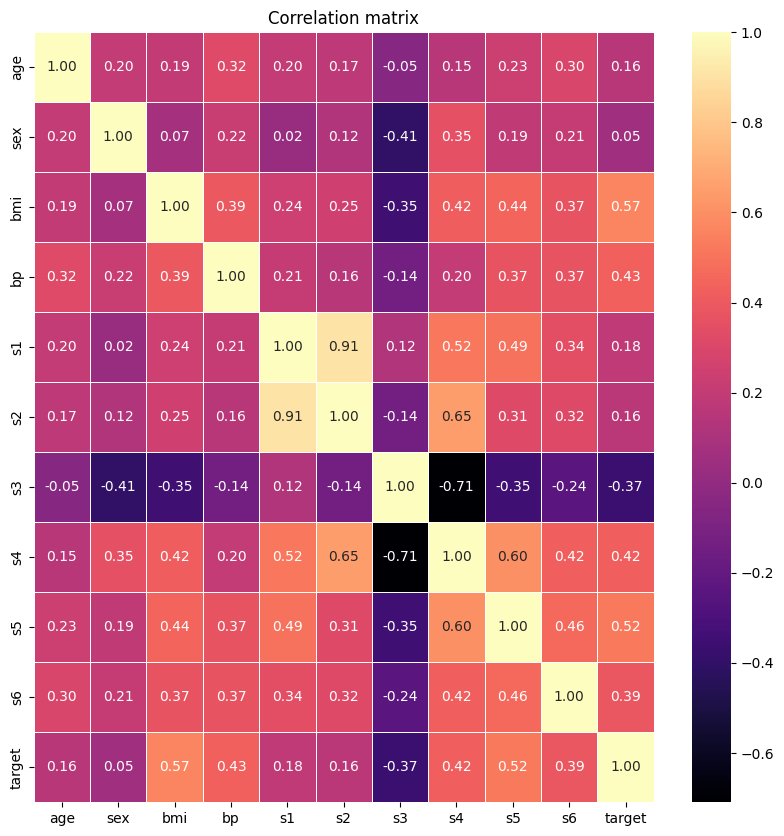

In [34]:
# Correlation matrix
correlation_matrix = train_df.corr()
# graphic
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="magma", fmt='.2f', linewidths=0.4)
plt.title('Correlation matrix')
plt.show()

# Saving linear model

In [22]:
import pickle

# Guardar el modelo entrenado usando pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(Linear_reg_model, file)
